In [51]:
import zipfile as zp

from PIL import Image
import pytesseract
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# loading the face detection classifier
#face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# the rest is up to you!

In [52]:
def getfaces(cv_img,faces):
    croppedfaces=[]
    #faces = face_cascade.detectMultiScale(cv_img,1.3,5)
    for x,y,w,h in faces:
        #cropped=cv_img.crop((x,y,x+w,y+h))
        cropped=cv_img[y:y+h, x:x+w]
        cropped=cv2.resize(cropped,(100,100))
        croppedfaces.append(cropped)
    len(croppedfaces)    
    #sheet(croppedfaces)
    plt.figure(figsize=(5,3)) 
    for i in range(len(croppedfaces)):
        plt.subplot(5,3,i+1)
        plt.imshow(croppedfaces[i])
        plt.axis('off')
    plt.show()

In [62]:
def search(filename,keyword):
    #keyword='Christopher'
    zf = zp.ZipFile(filename, 'r')
    print(zf.namelist())
    for im in zf.namelist():
        #extract and load images
        im=str(im)
        cv_img = cv2.imread(im)
        cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)    
        #extract text from imges
        text=pytesseract.image_to_string(cv_img)
        text_list=text.split('\n')
        count=0
        for st in text_list:
            if keyword in st:
                count+=1
        if count>=1:
            print('Results found in image {}'.format(im))
            faces = face_cascade.detectMultiScale(cv_img,1.3,5)
            if len(faces)>0:
                getfaces(cv_img,faces)
            else:
                print('But there no faces in that file!')
            
                    
                
        

['a-0.png', 'a-1.png', 'a-2.png', 'a-3.png']
Results found in image a-0.png


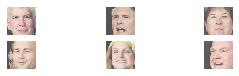

Results found in image a-3.png


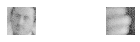

In [56]:
#search with keyword
search('small_img.zip','Christopher')

['a-0.png', 'a-1.png', 'a-10.png', 'a-11.png', 'a-12.png', 'a-13.png', 'a-2.png', 'a-3.png', 'a-4.png', 'a-5.png', 'a-6.png', 'a-7.png', 'a-8.png', 'a-9.png']
Results found in image a-0.png


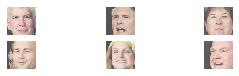

Results found in image a-1.png


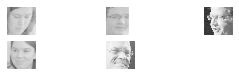

Results found in image a-10.png
But there no faces in that file!
Results found in image a-13.png


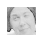

Results found in image a-2.png


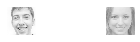

Results found in image a-3.png


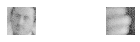

Results found in image a-8.png
But there no faces in that file!


In [63]:
search('images.zip','Mark')